#Course Project-2
#CSL7360 - Computer Vision
<BR>

#### Group Members:
Haardik Ravat B20EE021<BR>
Chakshu Anup Dhannawat B20AI006

## Libraries

In [ ]:
!pip install focal_loss
!pip install tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from skimage.feature import hog

import os
import glob
import cv2
import numpy as np
import random
from google.colab.patches import cv2_imshow
import scipy.ndimage as nd
from matplotlib import pyplot as plt

from focal_loss import BinaryFocalLoss
import cv2
import numpy as np
from matplotlib import pyplot as plt

# For graph related operations
import networkx as nx
from keras import models
from keras import layers

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Dropout, Input, LSTM, Dense, Conv2D, MaxPooling2D, Reshape, BatchNormalization, Activation, Conv2DTranspose, Add, ZeroPadding2D, Cropping2D, UpSampling2D

from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, SGD
from keras.backend import argmax
from keras.utils import to_categorical
from networkx.algorithms.flow import minimum_cut

## Datasets

In [ ]:
import tensorflow_datasets as tfds
(X_train, X_test), ds_info = tfds.load(
    'voc',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
) 

# Comparative Analysis on Benchmark Dataset(Pascal VOC)

# ReSeg- Using RNN+CNN for segmentation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 def load_h5(path):
	print('loading',path)
	file = h5py.File(name=path,mode='r')
	return file['images'],file['labels']
  

def load_train_data(path='/content/drive/My Drive/NNproject/voc2012_train.h5'):
        '''
        Load training data from .h5 files
        Args:
            train_data_load_path:The training data .h5 file path.
        '''
        return load_h5(path)

def load_val_data(path='/content/drive/My Drive/NNproject/voc2012_val.h5'):
        '''
        Load validation data from .h5 files
        Args:
            val_data_load_path:The validation data .h5 file path.
        '''
        return load_h5(path)

In [ ]:
train_images, train_labels = load_train_data()
val_images, val_labels = load_val_data()

np.set_printoptions(threshold=np.inf)

loading /content/drive/My Drive/NNproject/voc2012_train.h5
loading /content/drive/My Drive/NNproject/voc2012_val.h5


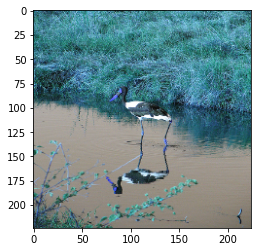

(1464, 224, 224)


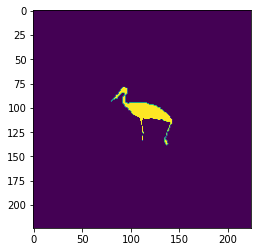

In [ ]:
train_images=np.asarray(train_images)
train_labels=np.asarray(train_labels)
val_images=np.asarray(val_images)
val_labels=np.asarray(val_labels)

# print(val_labels[100])

plt.figure()
plt.imshow(train_images[1200])
plt.show() 
plt.imshow(train_labels[1200])
print(train_labels.shape)

In [ ]:
train_images = train_images/255
val_images = val_images/255

In [ ]:
from keras.utils import to_categorical
y_trn= to_categorical(train_labels, num_classes=21)
y_val= to_categorical(val_labels, num_classes=21)

In [ ]:
print(y_trn.shape)

(1464, 224, 224, 21)


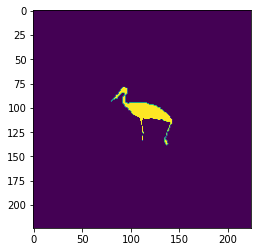

In [ ]:
# Check that the encoding is correct:
plt.figure()
plt.imshow(np.argmax(y_trn[1200], axis=2))
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.utils.model_zoo as model_zoo
from torchvision import models
import math

class ReNet(nn.Module):
    def __init__(self, num_input, num_units, patch_size=(1,1)):
        super(ReNet, self).__init__()
        self.patch_size_height = int(patch_size[0])
        self.patch_size_width = int(patch_size[1])

        self.rnn_horz = nn.GRU(input_size=num_input*self.patch_size_height*self.patch_size_width , hidden_size=num_units, num_layers=1, bias=True, batch_first=True, dropout=0, bidirectional=True)
        self.rnn_vert = nn.GRU(input_size=2*num_units, hidden_size=num_units, num_layers=1, bias=True, batch_first=True, dropout=0, bidirectional=True)


    def rnn_forward(self, x, h_or_v):
    	assert h_or_v in ['horz', 'vert']

    def forward(self,x):
    

class CNN(nn.Module):
	def __init__(self):
		super(CNN, self).__init__()

		self.vgg = models.vgg16(pretrained=True)	
        
	def forward(self,x):
		x = self.vgg(x)

		return x

class ReSeg(nn.Module):
    def __init__(self, num_classes):
        super(ReSeg, self).__init__()
        self.num_classes = num_classes		
        self.cnn = CNN()
        self.renet = ReNet()

    def forward(self,x):
        input = x
        x = self.cnn(x)
        x = self.renet

        return out

In [ ]:
opt = Adam(lr=0.001)
loss = 'categorical_crossentropy'
metrics = ['categorical_accuracy']
epochs = 100
steps_per_epoch = 80
new_model.compile(optimizer=opt, loss=loss, metrics=metrics)
history = new_model.fit(train_images, y_trn, validation_data=(val_images, y_val), epochs=epochs, verbose=True, batch_size=20)

Train on 1464 samples, validate on 1449 samples
Epoch 1/100
1464/1464 [==============================] - 115s 79ms/step - loss: 2.7372 - categorical_accuracy: 0.5658 - val_loss: 1.6788 - val_categorical_accuracy: 0.7295
Epoch 2/100
1464/1464 [==============================] - 102s 70ms/step - loss: 1.9700 - categorical_accuracy: 0.7025 - val_loss: 1.2656 - val_categorical_accuracy: 0.7339
Epoch 3/100
1464/1464 [==============================] - 102s 70ms/step - loss: 1.4733 - categorical_accuracy: 0.7353 - val_loss: 1.4773 - val_categorical_accuracy: 0.7111
Epoch 4/100
1464/1464 [==============================] - 102s 69ms/step - loss: 1.2824 - categorical_accuracy: 0.7443 - val_loss: 1.8104 - val_categorical_accuracy: 0.6945
Epoch 5/100
1464/1464 [==============================] - 102s 69ms/step - loss: 1.2074 - categorical_accuracy: 0.7497 - val_loss: 2.2856 - val_categorical_accuracy: 0.6297
Epoch 6/100
1464/1464 [==============================] - 102s 70ms/step - loss: 1.1742 - cat

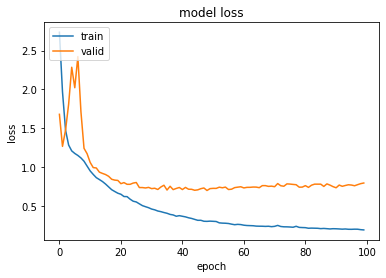

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')

In [ ]:
def show_result(img, index):

  x=img.reshape(1,224,224,3)

  d =new_model.predict(x)

  imclass = np.argmax(d, axis=3)[0,:,:]

  plt.figure(figsize = (15, 7))
  plt.subplot(1,3,1)
  plt.imshow( np.asarray(img) )
  plt.subplot(1,3,2)
  plt.imshow( np.asarray(img) )
  masked_imclass = np.ma.masked_where(imclass == 0, imclass)
  plt.imshow( masked_imclass, alpha=0.5 )
  
  plt.figure(figsize = (15, 7))
  plt.subplot(1,3,1, title='Our target')
  plt.imshow( val_labels[index] )
  plt.subplot(1,3,2, title='Our prediction')
  plt.imshow( imclass )

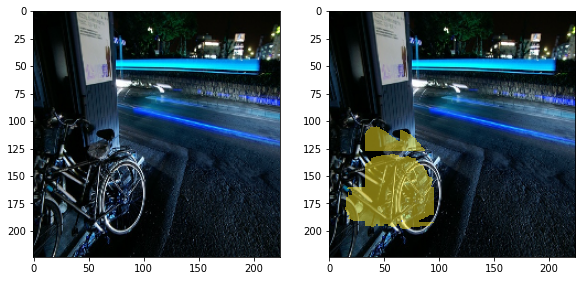

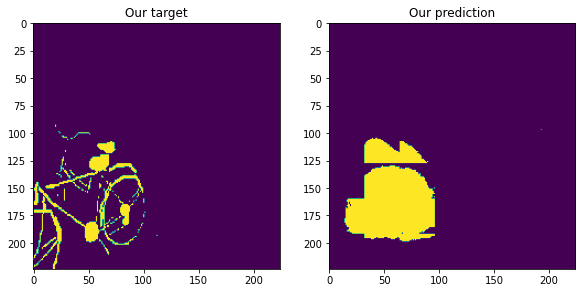

In [ ]:
show_result(val_images[15], 15)

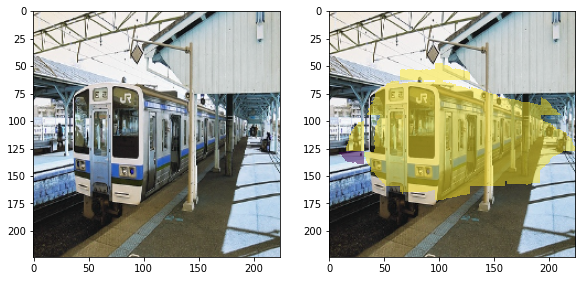

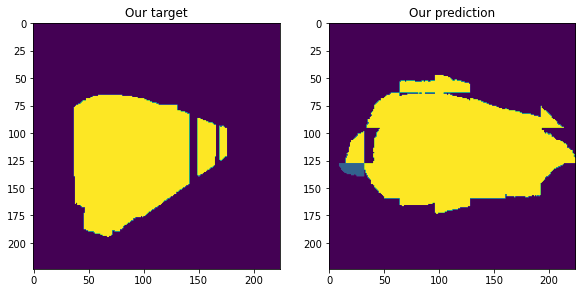

In [ ]:
show_result(val_images[17], 17)

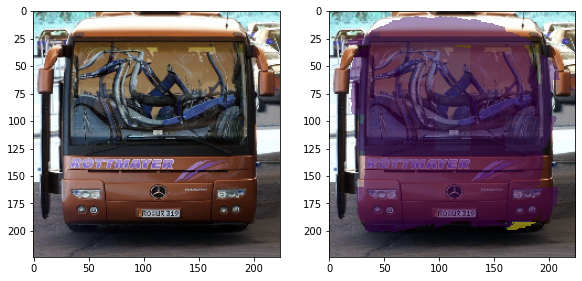

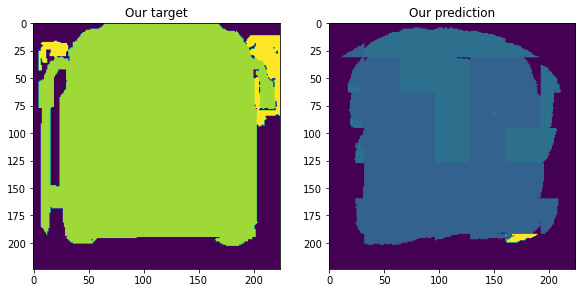

In [ ]:
show_result(val_images[19], 19)

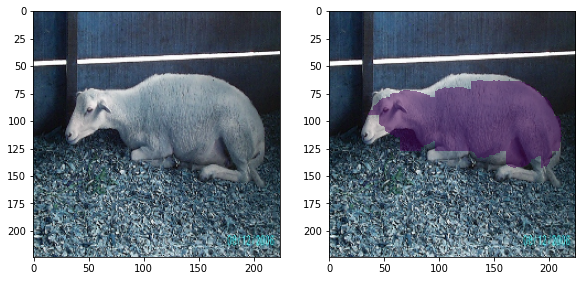

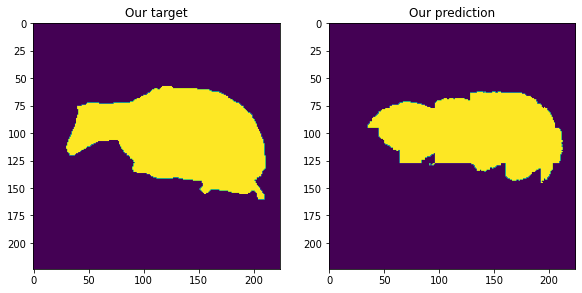

In [ ]:
show_result(val_images[20], 20)

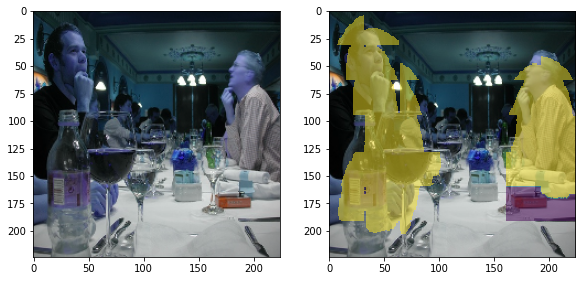

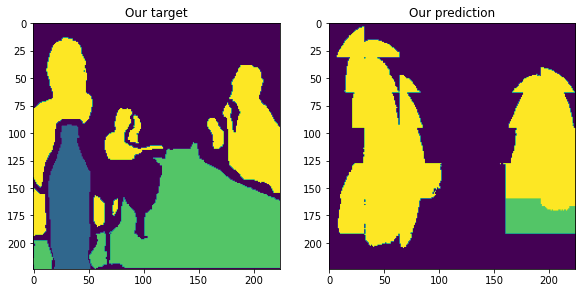

In [ ]:
show_result(val_images[22], 22)

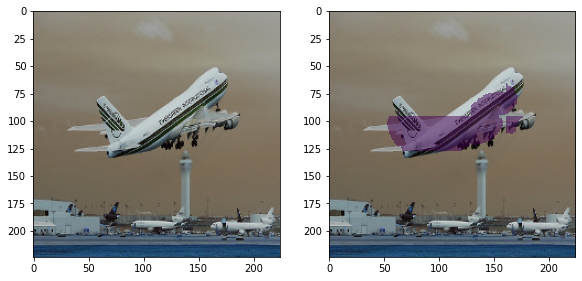

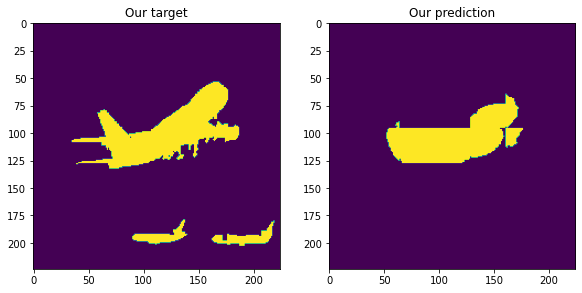

In [ ]:
show_result(val_images[36], 36)

#MRF-MAP Segmentation using Graph Cut

In [ ]:
def gaussian(Y, mu, sigma):
    """ Computes the Gaussian PDF at all points in Y """
    num = np.exp(-0.5 * (((Y - mu) / sigma)**2))
    den = np.sqrt(2 * np.pi)*sigma
    return num / den

In [ ]:
def LLR(Y, mu, sigma):
    """ Returns the log-likelihood ratio for all pixels (This is independant of X, but depends on mu and sigma) """
    num = gaussian(Y, mu[1], sigma[1])
    den = gaussian(Y, mu[0], sigma[0])
    return np.log(num / den)

In [ ]:
def getNeighbors(i, j, R, C):
    """ Returns the 8 neighbours for the pixel (i, j) without wrap-around """
    neighbors = []
    d = [-1, 0, 1]
    for sx in d:
        for sy in d:
            if not (sx == 0 and sy == 0):
                n = [i + sx, j + sy]
                if (C-1 >= n[0] >= 0) and (R-1 >= n[1] >= 0):
                    neighbors.append(n)
    return neighbors

In [ ]:
def buildG(Y, beta, mu, sigma):
   

    G = nx.DiGraph() 
    G.add_node("s") 
    G.add_node("t")

    R, C = Y.shape

    llr = LLR(Y, mu, sigma) 

    for i in range(R):
        for j in range(C):

            node = "({}, {})".format(i, j)

            if llr[i, j] > 0:
                G.add_edge("s", node, capacity = llr[i, j])

        
            else:
                G.add_edge(node, "t", capacity = -1*llr[i, j])

            neighbors = getNeighbors(i, j, R, C)
            for n in neighbors:
                n_node = "({}, {})".format(n[0], n[1])
                G.add_edge(node, n_node, capacity = beta)

    return G

In [ ]:
def cutG(g):

    cut_val, partition = minimum_cut(g, "s", "t")
    S, T = partition
    S.remove("s")
    T.remove("t")
    S = list(S)
    T = list(T)
    return cut_val, S, T

In [ ]:
def updateSeg(S, T, R, C):
   
    X = np.zeros([R, C])
    for s in S:
        pixel = eval(s)
        X[pixel] = 1.  
    for t in T:
        pixel = eval(t)
        X[pixel] = 0. 
    return X

In [ ]:
def updateNoiseParams(Y, X):
   
    mu = np.array([0., 0.])
    sigma = np.array([0., 0.])

    mask_0 = (X == 0.)
    y0 = Y[mask_0]
    mu[0] = y0.mean()
    sigma[0] = y0.std()

    mask_1 = (X == 1.)
    y1 = Y[mask_1]
    mu[1] = y1.mean()
    sigma[1] = y1.std()

    return mu, sigma

In [ ]:
def optimize(Y, X, mu, sigma, beta, N_iters, eps = 1e-5):
  
    R, C = Y.shape

    loss = []
    for i in range(N_iters):

      
        g = buildG(Y, beta, mu, sigma)
        
        cut_val, S, T = cutG(g)
        loss.append(cut_val)
        
        if i > 2 and (abs(loss[-1] - loss[-2])/loss[-2] <= eps or loss[-1] > loss[-2]):
            break

        
        X = updateSeg(S, T, R, C)

    
        mu, sigma = updateNoiseParams(Y, X)

    return X, mu, sigma, loss

In [ ]:
def disp(img):
   
    plt.imshow(img, cmap = "gray")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [ ]:
def scale(img):
  
    img_01 = (img - np.min(img))/np.ptp(img)
    return img_01

In [ ]:
def load(path, shape):
    img = cv2.imread(path, 0)
    img = cv2.resize(img, (shape[1], shape[0]), interpolation = cv2.INTER_CUBIC)
    img = scale(img)
    return img

In [ ]:
def addNoise(img, sigma_noise = 0.25):
    noise = sigma_noise * np.random.normal(0, 1, img.shape)
    img = img + noise
    img = scale(img)
    return img

In [ ]:
def threshold(img, thresh = 0.5):
    img = img > thresh
    img = img.astype(float)
    return img

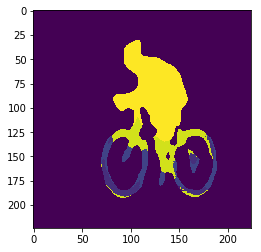

In [ ]:
disp(X)

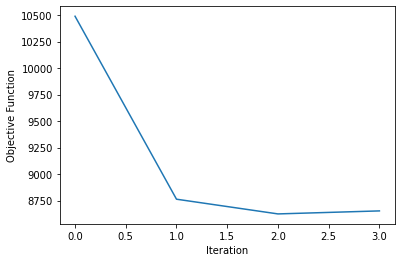

In [ ]:
plt.plot(range(len(loss)), loss)
plt.xlabel("Iteration")
plt.ylabel("Objective Function")
plt.show()

#U-Net using ResNet as encoder

In [ ]:
!pip install segmentation_models_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
VOC_COLORMAP = [
    [0, 0, 0],
    [128, 0, 0],
    [0, 128, 0],
    [128, 128, 0],
    [0, 0, 128],
    [128, 0, 128],
    [0, 128, 128],
    [128, 128, 128],
    [64, 0, 0],
    [192, 0, 0],
    [64, 128, 0],
    [192, 128, 0],
    [64, 0, 128],
    [192, 0, 128],
    [64, 128, 128],
    [192, 128, 128],
    [0, 64, 0],
    [128, 64, 0],
    [0, 192, 0],
    [128, 192, 0],
    [0, 64, 128],
]

In [ ]:
class VocDataset(Dataset):
  def __init__(self,dir,color_map):
    self.root=os.path.join(dir,'VOCdevkit/VOC2012')
    self.target_dir=os.path.join(self.root,'SegmentationClass')
    self.images_dir=os.path.join(self.root,'JPEGImages')
    file_list=os.path.join(self.root,'ImageSets/Segmentation/trainval.txt')
    self.files = [line.rstrip() for line in tuple(open(file_list, "r"))]
    self.color_map=color_map
    # self.pallete=self.get_collors()


  def convert_to_segmentation_mask(self,mask):
  # This function converts color channels of semgentation masks to number of classes (21 in this case)
  # Semantic Segmentation requires a segmentation mask to be a NumPy array with the shape [height, width, num_classes].
  # Each channel in this mask should encode values for a single class. Pixel in a mask channel should have
  # a value of 1.0 if the pixel of the image belongs to this class and 0.0 otherwise.
    height, width = mask.shape[:2]
    segmentation_mask = np.zeros((height, width, len(self.color_map)), dtype=np.float32)
    for label_index, label in enumerate(self.color_map):
          segmentation_mask[:, :, label_index] = np.all(mask == label, axis=-1).astype(float)
    return segmentation_mask

  def __getitem__(self,index):
    image_id=self.files[index]
    image_path=os.path.join(self.images_dir,f"{image_id}.jpg")
    label_path=os.path.join(self.target_dir,f"{image_id}.png")
    image=cv.imread(image_path)
    image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
    image=cv.resize(image,(256,256))
    image=torch.tensor(image).float()
    label=cv.imread(label_path)
    label=cv.cvtColor(label,cv.COLOR_BGR2RGB)
    label=cv.resize(label,(256,256))
    label = self.convert_to_segmentation_mask(label)
    label=torch.tensor(label).float()
    
    return image,label


  
  def __len__(self):
    return len(self.files)

In [ ]:
data=VocDataset('/content',VOC_COLORMAP)
# plt.imshow(data.__getitem__(50)[1]/255)
data.__len__()

2913

In [ ]:
train_set,val_set=torch.utils.data.random_split(data,[int(len(data)*0.9),round(len(data)*0.1)+1])
train_loader=DataLoader(train_set,batch_size=10,shuffle=True)
val_loader=DataLoader(val_set,batch_size=10,shuffle=False)

In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-ehmoi27r
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-ehmoi27r
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit e7cbea0bbd546167b9d1757b2cfeca3fbe26a33e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.2 MB/s eta 0:00:00
  Created wheel for segmentation-models-pytorch: filename=segmentation_models_pytorch-0.3.2-py

In [ ]:

import segmentation_models_pytorch as smp
model = smp.Unet(encoder_name='resnet18',classes=21,activation='softmax')
model=model.to(device)
criterion = smp.losses.DiceLoss(eps=1.,mode='multiclass')
metrics = smp.metrics.iou_score
optimizer=torch.optim.Adam(model.parameters(),lr=0.0001)
scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,verbose=True)

In [ ]:
def train(model,optim,loss_f,epochs,scheduler,path_for_models):
  try:
    os.mkdir(path_for_models)
  except:
    path_for_models=path_for_models

  min_iou=0.3
  for epoch in tqdm(range(epochs)):
    for (X_train,y_train) in train_loader:
      X_train,y_train=X_train.to(device),y_train.to(device,dtype=torch.int64)
      X_train = X_train.permute(0, 3, 1, 2)
      y_train = y_train.permute(0, 3, 1, 2)
      y_pred=model(X_train)
      loss=loss_f(y_pred,y_train)

      optim.zero_grad()
      loss.backward()
      optim.step()
    ious=[]
    val_losses=[]
    with torch.no_grad():
      for b,(X_test,y_test) in enumerate(val_loader):
        X_test,y_test=X_test.to(device),y_test.to(device)
        X_test = X_test.permute(0, 3, 1, 2)
        y_test = y_test.permute(0, 3, 1, 2)
        y_val=model(X_test)
        val_loss=loss_f(y_val,y_test)
        val_losses.append(val_loss)
        iou_=metrics(y_val,y_test)
        ious.append(iou_)
      ious=torch.tensor(ious)
      val_losses=torch.tensor(val_losses)
      scheduler.step(val_losses.mean())
      if ious.mean() > min_iou:
        min_iou=ious.mean()
        torch.save(model.state_dict(),f"{path_for_models}/unetmodel.pt")
    print(f"epoch : {epoch:2} train_loss: {loss:10.4} , val_loss : {val_losses.mean()} val_iou: {ious.mean()}")


train(model,optimizer,criterion,10,scheduler,'models')

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/segmentation_models_pytorch/base/modules.py:104: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)
 10%|█         | 1/10 [05:28<49:19, 328.85s/it]

epoch :  0 train_loss:     0.2372 , val_loss : 0.2885589301586151 val_iou: 0.6488827466964722


 20%|██        | 2/10 [10:58<43:55, 329.50s/it]

epoch :  1 train_loss:     0.6639 , val_loss : 0.26407358050346375 val_iou: 0.6479895710945129


 30%|███       | 3/10 [16:25<38:16, 328.00s/it]

epoch :  2 train_loss:     0.2863 , val_loss : 0.2526625394821167 val_iou: 0.6512693762779236


 40%|████      | 4/10 [21:50<32:42, 327.12s/it]

epoch :  3 train_loss:     0.7033 , val_loss : 0.2408788800239563 val_iou: 0.6553050875663757


 50%|█████     | 5/10 [27:16<27:13, 326.75s/it]

epoch :  4 train_loss:     0.2706 , val_loss : 0.24041648209095 val_iou: 0.6555858850479126


 60%|██████    | 6/10 [32:42<21:44, 326.21s/it]

epoch :  5 train_loss:     0.2192 , val_loss : 0.2405693382024765 val_iou: 0.6523119807243347


 70%|███████   | 7/10 [38:09<16:19, 326.48s/it]

epoch :  6 train_loss:     0.1162 , val_loss : 0.23595142364501953 val_iou: 0.6574640870094299


 80%|████████  | 8/10 [43:39<10:55, 327.81s/it]

epoch :  7 train_loss:     0.5299 , val_loss : 0.235015869140625 val_iou: 0.6567326784133911


 90%|█████████ | 9/10 [49:10<05:28, 328.77s/it]

epoch :  8 train_loss:     0.6143 , val_loss : 0.23716644942760468 val_iou: 0.6532447934150696


100%|██████████| 10/10 [54:41<00:00, 328.18s/it]

epoch :  9 train_loss:      0.193 , val_loss : 0.2352471649646759 val_iou: 0.6643279790878296


In [ ]:
model.load_state_dict(torch.load('/content/models/unetmodel.pt'))

model.eval()

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [ ]:
def decode_segmap(image,colors,nc=21):
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  # image.unsqueeze(-1)
  for l in range(0,nc):
    idx = image == l
    r[idx] = colors[l, 0]
    g[idx] = colors[l, 1]
    b[idx] = colors[l, 2]
  rgb = np.stack([r, g, b], axis=2)
  return rgb


In [ ]:
import imageio


In [ ]:
def image(img_path):
  img=cv.imread(img_path,cv.IMREAD_COLOR)
  # img=cv.resize(img,(500,))
  img=torch.tensor(img)
  image = torch.argmax(img.squeeze(), dim=2).detach().cpu().numpy()
  return image


In [ ]:
colorss =np.array([
    [0, 0, 0],
    [128, 0, 0],
    [0, 128, 0],
    [128, 128, 0],
    [0, 0, 128],
    [128, 0, 128],
    [0, 128, 128],
    [128, 128, 128],
    [64, 0, 0],
    [192, 0, 0],
    [64, 128, 0],
    [192, 128, 0],
    [64, 0, 128],
    [192, 0, 128],
    [64, 128, 128],
    [192, 128, 128],
    [0, 64, 0],
    [128, 64, 0],
    [0, 192, 0],
    [128, 192, 0],
    [0, 64, 128],
])

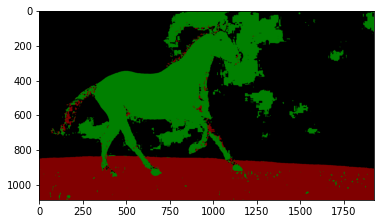

In [ ]:

rgb = decode_segmap(image('/content/hose.png'),colorss)
plt.imshow(rgb); plt.show()

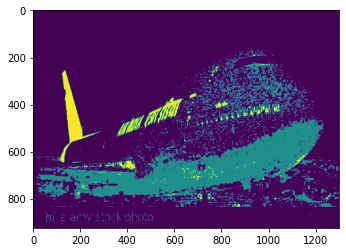

In [ ]:
plt.imshow(image('/content/aeroplane.jpg'))

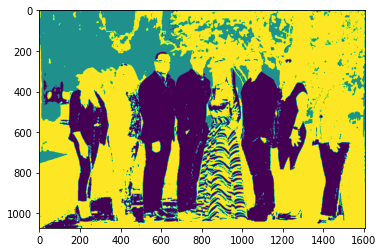

In [ ]:
plt.imshow(image('/content/people.jfif'))

#FCN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import fastai
from fastai import *
from fastai.vision import *

import pathlib
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
files_to_keep = pathlib.PosixPath('./VOCdevkit/VOC2012/ImageSets/Segmentation/')
keep_train_val = files_to_keep/'val.txt'
keep_train_val

PosixPath('VOCdevkit/VOC2012/ImageSets/Segmentation/val.txt')

In [ ]:
data.classes

array(['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow',
       'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'],
      dtype='<U11')

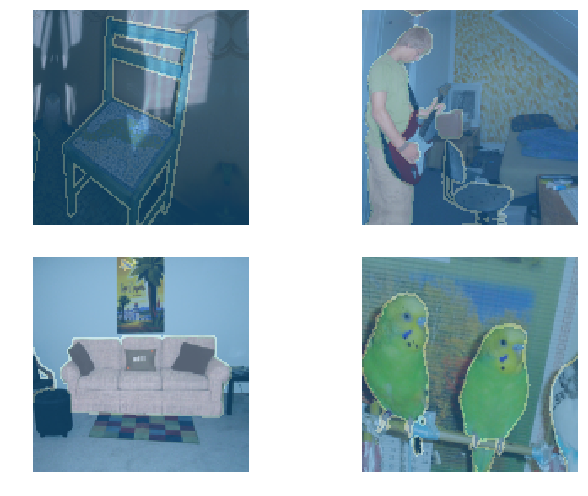

In [ ]:
data.show_batch(rows=2,figsize=(10,7))

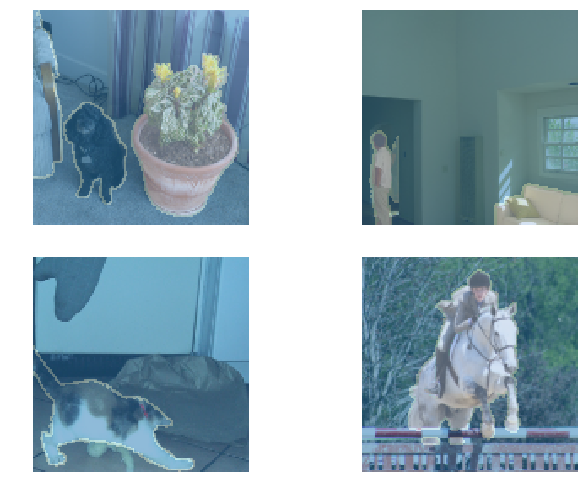

In [ ]:
data.show_batch(rows=2,figsize=(10,7),ds_type=DatasetType.Valid)

In [ ]:
def custom_loss(y_hat,y):
    y = y.squeeze(1)
    loss = nn.CrossEntropyLoss(ignore_index=255)
    return loss(y_hat,y)

In [ ]:
def custom_acc(input,targs):
    targs = targs.squeeze(dim=1)
    input = input.argmax(dim=1)
    
    return (input.flatten()==targs.flatten()).float().mean()

In [ ]:
learn = unet_learner(data,models.resnet34,metrics=custom_acc,loss_func=custom_loss)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


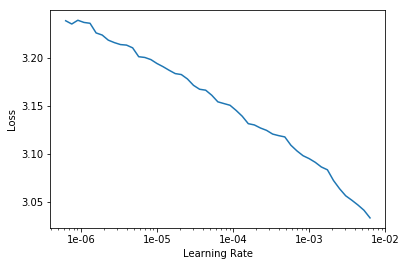

In [ ]:
lr_find(learn)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10,slice(1e-3))

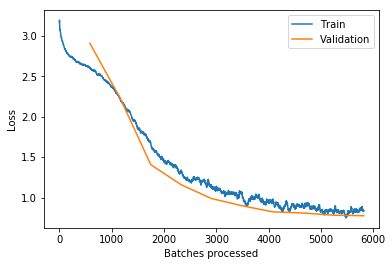

In [ ]:
learn.recorder.plot_losses()

In [ ]:
img = learn.data.valid_ds[0][0]
learn.predict(img)

(ImageSegment (1, 128, 128), tensor([[[ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]]), tensor([[[ 4.5856,  4.5882,  4.5551,  ...,  4.7410,  4.7440,  4.7500],
          [ 4.5971,  4.6035,  4.5722,  ...,  4.7543,  4.7560,  4.7591],
          [ 4.6035,  4.6097,  4.6014,  ...,  4.7610,  4.7634,  4.7662],
          ...,
          [ 4.7067,  4.7021,  4.6910,  ...,  4.1472,  4.1641,  4.1756],
          [ 4.6691,  4.6659,  4.6589,  ...,  4.1474,  4.1874,  4.2245],
          [ 4.6324,  4.6300,  4.6276,  ...,  4.1404,  4.2055,  4.2660]],
 
         [[-0.8115, -0.8221, -0.8325,  ..., -0.8316, -0.8285, -0.8187],
          [-0.8153, -0.8234, -0.8337,  ..., -0.8309, -0.8276, -0.8180],
          [-0.8186, -0.8266, -0.8312,  ..., -0.8354, -0.8292, -0.8173],
          ...,
          [-0.8371, -0

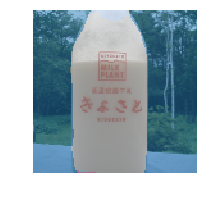

In [ ]:
img.show(y=learn.predict(img)[0])

In [ ]:
data = (SegmentationItemList.from_folder(image_ip)
        .random_split_by_pct()
        .label_from_func(get_y_fn,classes=codes)
        .transform(get_transforms(),size=224,tfm_y=True)
        .databunch(bs=4))

In [ ]:
img = open_image('person_bicycle.jpg')

In [ ]:
img.resize(size=224)
img.data.size()

torch.Size([3, 224, 224])

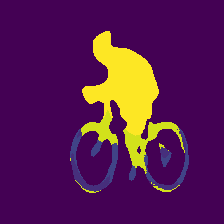

In [ ]:
img_pred = learn.predict(img)
img_pred[0]

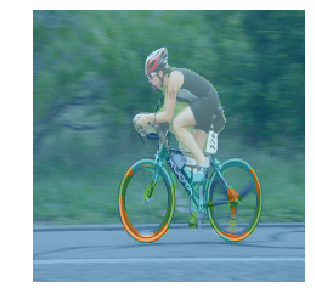

In [ ]:
img.show(y=learn.predict(img)[0],figsize=(5,5))

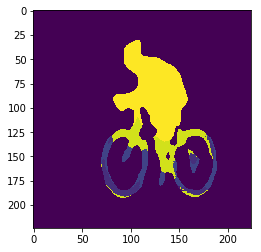

In [ ]:
# plt.imshow(img_pred[0].data)
temp = np.array(learn.predict(img)[0].data)
temp = temp.squeeze()
plt.imshow(temp)

#Comparative analysis of the approaches

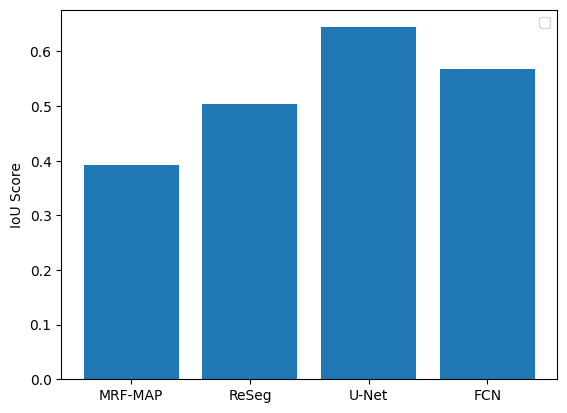

In [ ]:
x_labels = ['MRF-MAP', 'ReSeg', 'U-Net', 'FCN']
plt.bar(x_labels , IoU_score)
plt.xticks(x_labels)
plt.ylabel("IoU Score")
plt.legend()
plt.show()

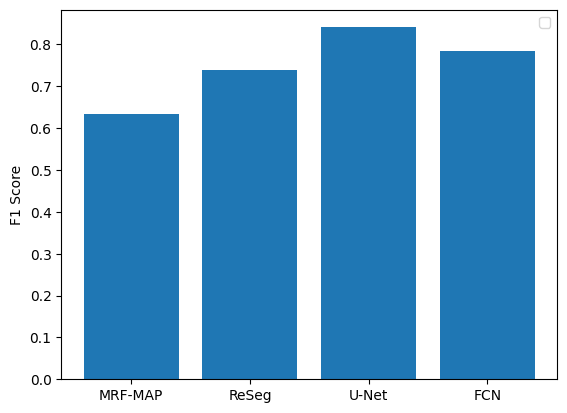

In [ ]:
plt.bar(x_labels , pixel_accuracy)
plt.xticks(x_labels)
plt.ylabel("F1 Score")
plt.legend()
plt.show()

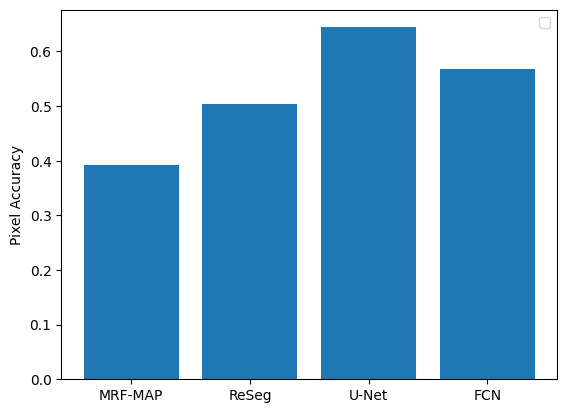

In [ ]:
plt.bar(x_labels , IoU_score)
plt.xticks(x_labels)
plt.ylabel("Pixel Accuracy")
plt.legend()
plt.show()

#Medical Image Segmentation - Application

In [ ]:
kernel1 = np.array([[1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1]], dtype="uint8")

In [ ]:
image_names = glob.glob("/content/drive/MyDrive/All images for segmentation/Image/*")
image_names.sort()
image_names_subset = image_names
images = [cv2.resize(cv2.imread(image), (512,512)) for image in image_names_subset]
image_dataset = np.array(images)
len(image_dataset)

183

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
mask_names = glob.glob("/content/drive/MyDrive/All images for segmentation/Mask/*")
mask_names.sort()
mask_names_subset = mask_names
masks = [cv2.resize(cv2.imread(mask, 0),(512,512)) for mask in mask_names_subset]
mask_dataset = np.array(masks)
len(mask_dataset)

183

In [ ]:
mask_dataset = np.expand_dims(mask_dataset, axis = 3)/255

In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)

Image data shape is:  (183, 512, 512, 3)
Mask data shape is:  (183, 512, 512, 1)


In [ ]:
image_dataset = np.array(image_dataset)/255

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)


def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


def conv_block(x, filter_size, size, dropout, batch_norm=False):
    
    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)
    
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    return conv


def repeat_elem(tensor, rep):
  

     return layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)


def res_conv_block(x, filter_size, size, dropout, batch_norm=False):
                                      



    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation('relu')(conv)
    
    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
 
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    shortcut = layers.Conv2D(size, kernel_size=(1, 1), padding='same')(x)
    if batch_norm is True:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)

    res_path = layers.add([shortcut, conv])
    res_path = layers.Activation('relu')(res_path)    
    return res_path

def gating_signal(input, out_size, batch_norm=False):
  
    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def attention_block(x, gating, inter_shape):
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

    theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(2, 2), padding='same')(x)  # 16
    shape_theta_x = K.int_shape(theta_x)

    phi_g = layers.Conv2D(inter_shape, (1, 1), padding='same')(gating)
    upsample_g = layers.Conv2DTranspose(inter_shape, (3, 3),
                                 strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]),
                                 padding='same')(phi_g)  # 16

    concat_xg = layers.add([upsample_g, theta_x])
    act_xg = layers.Activation('relu')(concat_xg)
    psi = layers.Conv2D(1, (1, 1), padding='same')(act_xg)
    sigmoid_xg = layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)  # 32

    upsample_psi = repeat_elem(upsample_psi, shape_x[3])

    y = layers.multiply([upsample_psi, x])

    result = layers.Conv2D(shape_x[3], (1, 1), padding='same')(y)
    result_bn = layers.BatchNormalization()(result)
    return result_bn




def UNet(input_shape, NUM_CLASSES=1, dropout_rate=0.0, batch_norm=True):
    
    FILTER_NUM = 64 
    FILTER_SIZE = 3 
    UP_SAMP_SIZE = 2 
    

    inputs = layers.Input(input_shape, dtype=tf.float32)

    conv_128 = conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers
   
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, conv_16], axis=3)
    up_conv_16 = conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, conv_32], axis=3)
    up_conv_32 = conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, conv_64], axis=3)
    up_conv_64 = conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
   
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, conv_128], axis=3)
    up_conv_128 = conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers
   
    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    conv_final = layers.Activation('sigmoid')(conv_final)  #Change to softmax for multichannel

    # Model 
    model = models.Model(inputs, conv_final, name="UNet")
    print(model.summary())
    return model

def Attention_UNet(input_shape, NUM_CLASSES=1, dropout_rate=0.0, batch_norm=True):

    FILTER_NUM = 64 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters
    
    inputs = layers.Input(input_shape, dtype=tf.float32)

    conv_128 = conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)
    gating_16 = gating_signal(conv_8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(conv_16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, att_16], axis=3)
    up_conv_16 = conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(conv_32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=3)
    up_conv_32 = conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(conv_64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=3)
    up_conv_64 = conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=3)
    up_conv_128 = conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers
    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    conv_final = layers.Activation('sigmoid')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs, conv_final, name="Attention_UNet")
    return model

def Attention_ResUNet(input_shape, NUM_CLASSES=1, dropout_rate=0.0, batch_norm=True):
   
    FILTER_NUM = 64 
    FILTER_SIZE = 3 
    UP_SAMP_SIZE = 2 
  
    inputs = layers.Input(input_shape, dtype=tf.float32)
    axis = 3

    conv_128 = res_conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = res_conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = res_conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = res_conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = res_conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    gating_16 = gating_signal(conv_8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(conv_16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, att_16], axis=axis)
    up_conv_16 = res_conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(conv_32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=axis)
    up_conv_32 = res_conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(conv_64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=axis)
    up_conv_64 = res_conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=axis)
    up_conv_128 = res_conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=axis)(conv_final)
    conv_final = layers.Activation('sigmoid')(conv_final)  

    model = models.Model(inputs, conv_final, name="AttentionResUNet")
    return model



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.2, random_state = 42)

In [ ]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]
input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [ ]:
print(input_shape)

(512, 512, 3)


In [ ]:
model2 = Attention_UNet(input_shape)
model2.compile(optimizer='adam', loss=BinaryFocalLoss(gamma=2), metrics=['accuracy', jacard_coef])
model2.summary()

Model: "Attention_UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                    

In [ ]:
model = Attention_UNet(input_shape)
model2.compile(optimizer='adam', loss=BinaryFocalLoss(gamma=2), metrics=['accuracy', jacard_coef])
model.summary()

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 512, 512, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_19 (BatchN  (None, 512, 512, 64  256        ['conv2d_19[0][0]']              
 ormalization)                  )                                                              

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size = 4, 
                    verbose=1, 
                    epochs=30, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/30
37/37 [==============================] - 178s 4s/step - loss: 0.1880 - accuracy: 0.3792 - jacard_coef: 0.0830 - val_loss: 2.9561 - val_accuracy: 0.8166 - val_jacard_coef: 1.4560e-05
Epoch 2/30
37/37 [==============================] - 128s 3s/step - loss: 0.1612 - accuracy: 0.4484 - jacard_coef: 0.0857 - val_loss: 2.9558 - val_accuracy: 0.8120 - val_jacard_coef: 7.3798e-05
Epoch 3/30
37/37 [==============================] - 128s 3s/step - loss: 0.1471 - accuracy: 0.5814 - jacard_coef: 0.0978 - val_loss: 2.2398 - val_accuracy: 0.7991 - val_jacard_coef: 0.0055
Epoch 4/30
37/37 [==============================] - 128s 3s/step - loss: 0.1318 - accuracy: 0.7081 - jacard_coef: 0.1100 - val_loss: 0.1591 - val_accuracy: 0.7552 - val_jacard_coef: 0.0776
Epoch 5/30
37/37 [==============================] - 128s 3s/step - loss: 0.1186 - accuracy: 0.7662 - jacard_coef: 0.1182 - val_loss: 0.1569 - val_accuracy: 0.8040 - val_jacard_coef: 0.0736
Epoch 6/30
37/37 [=============================

In [ ]:
model.save('unet_all_images.hdf5')

In [ ]:
X_test.shape

(37, 512, 512, 3)

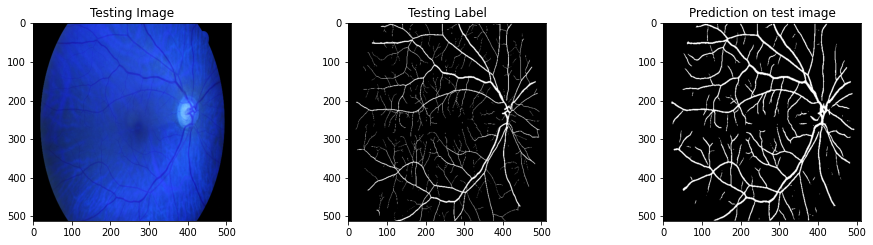

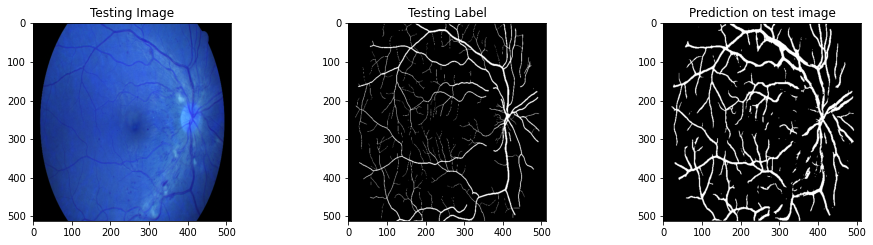

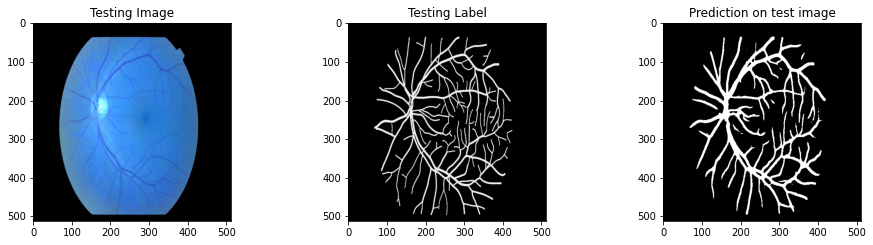

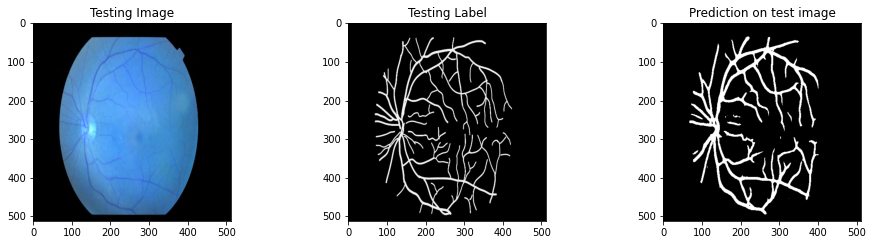

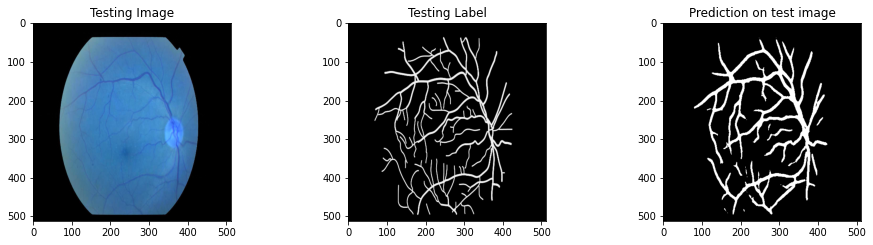

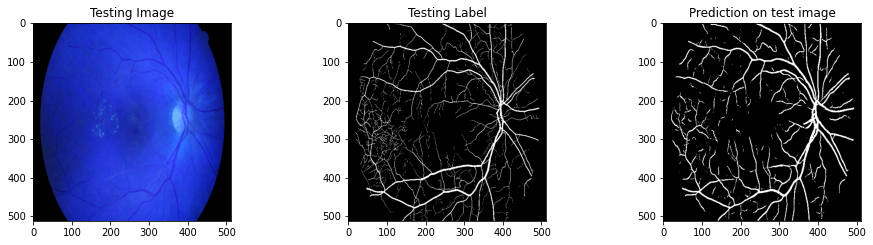

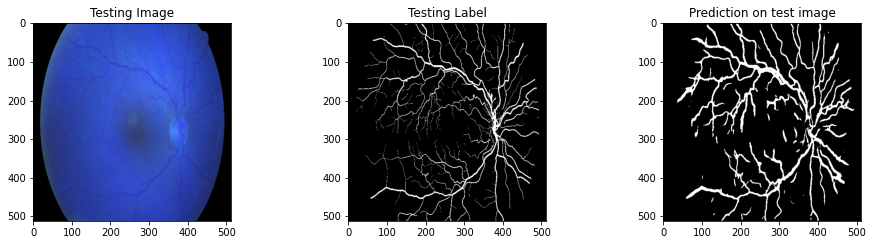

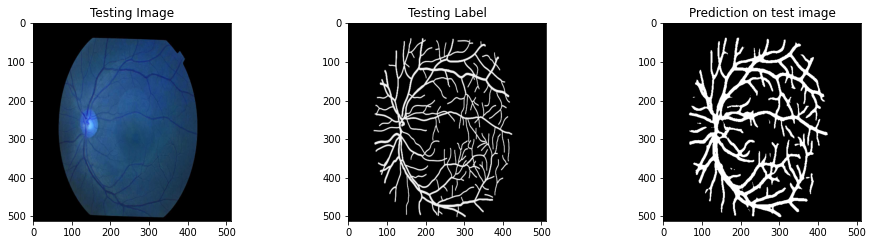

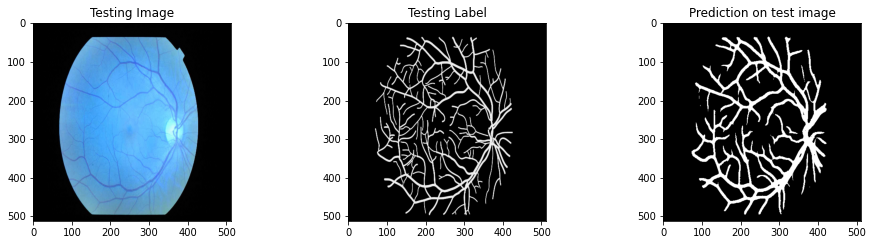

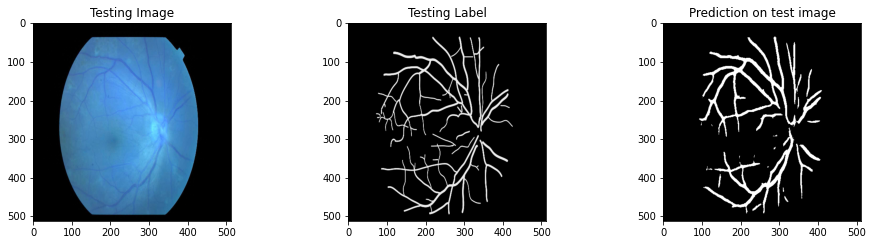

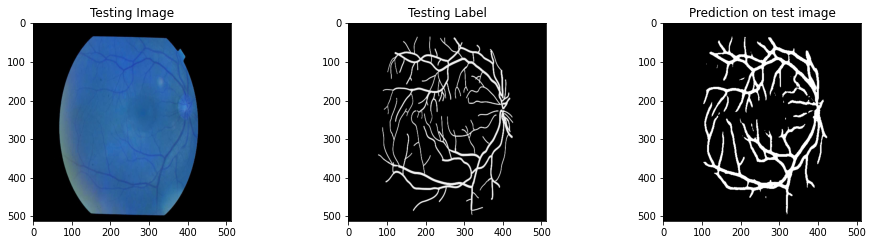

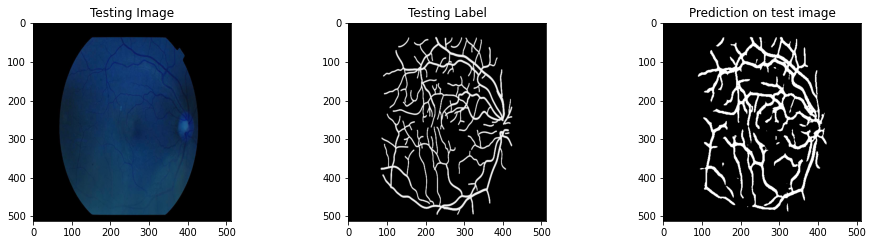

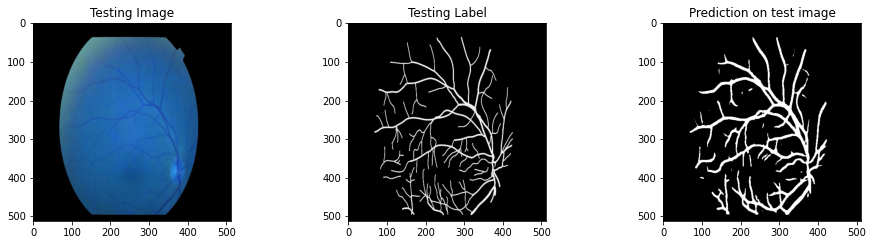

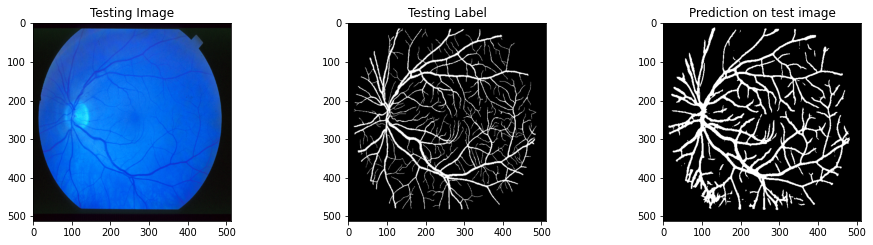

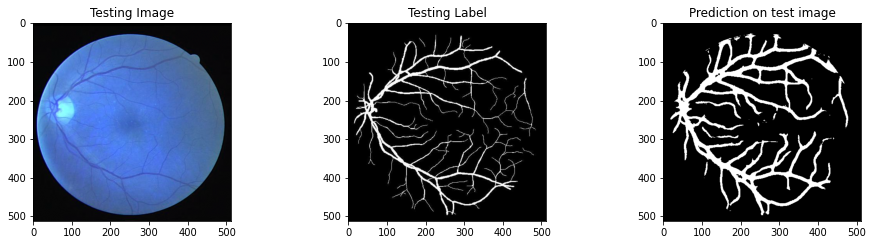

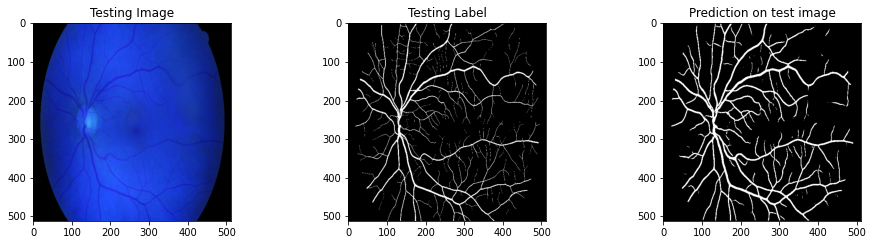

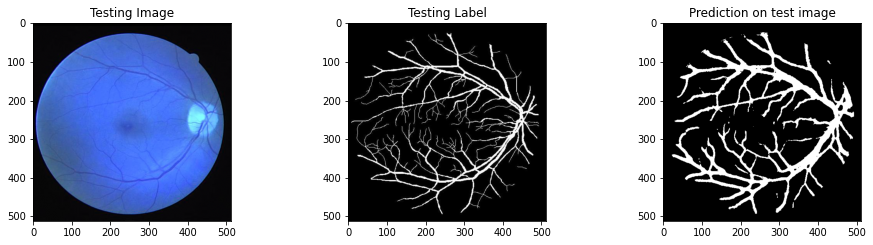

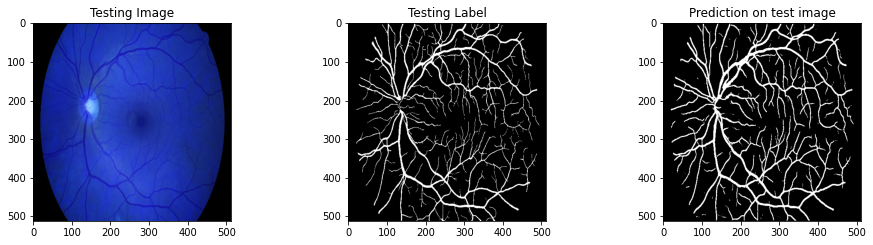

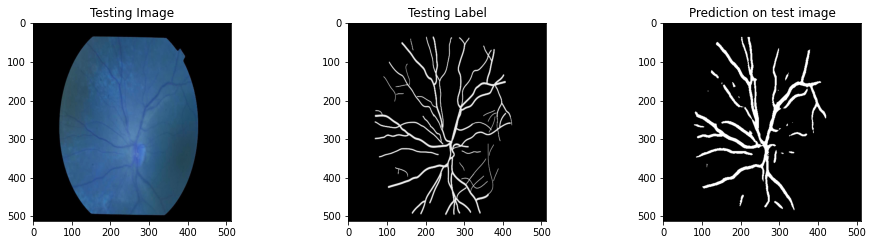

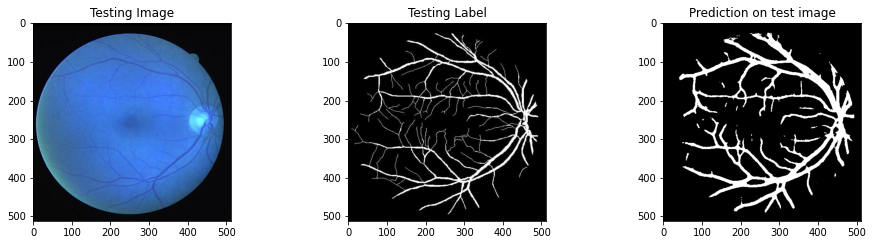

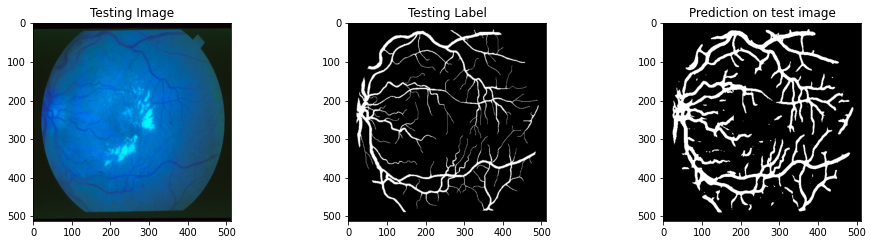

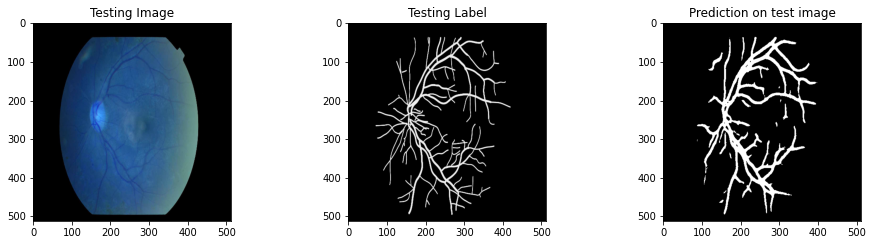

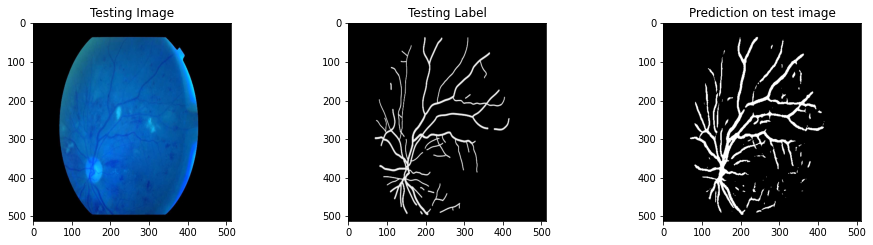

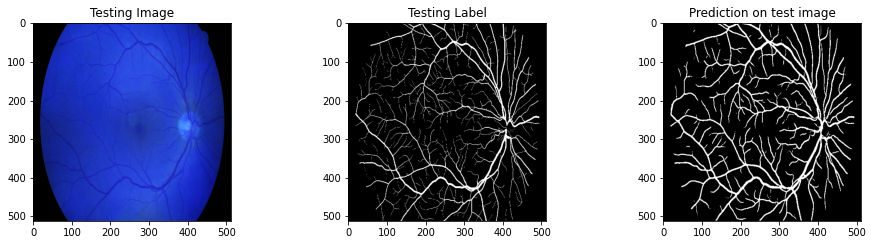

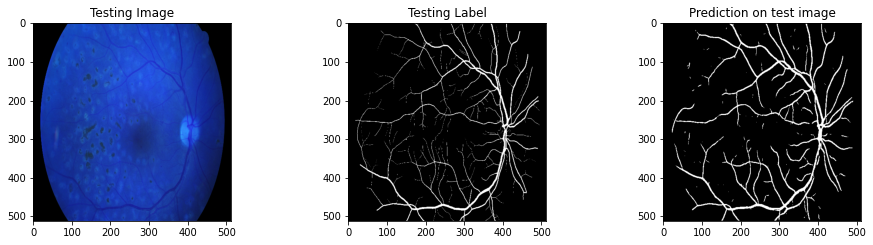

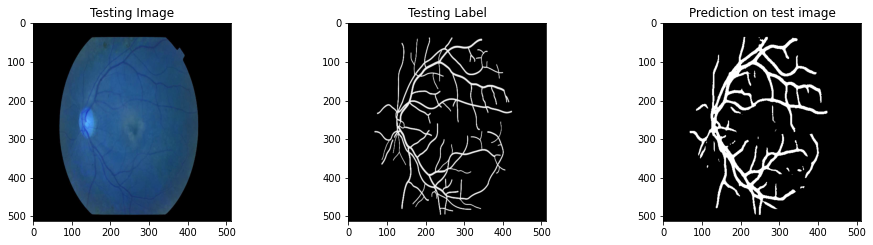

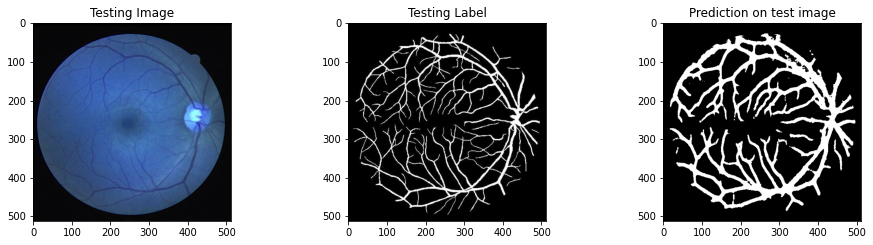

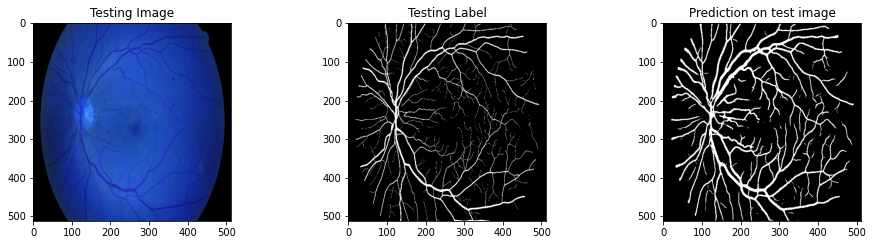

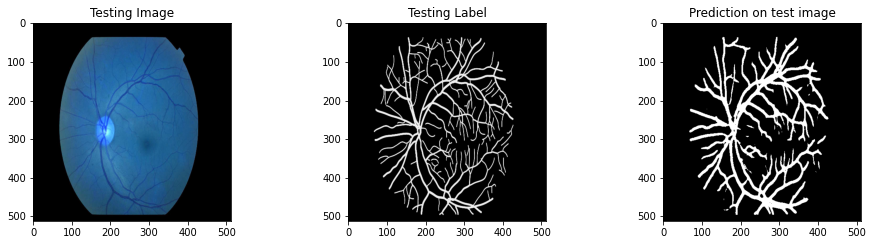

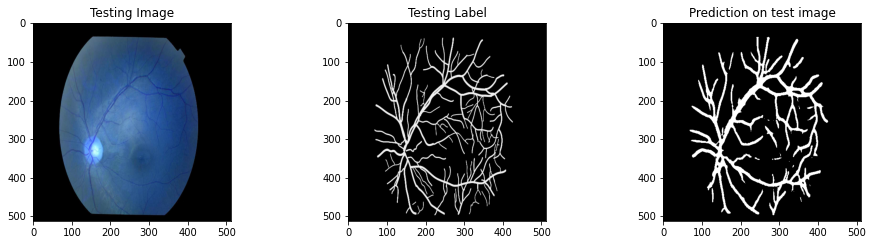

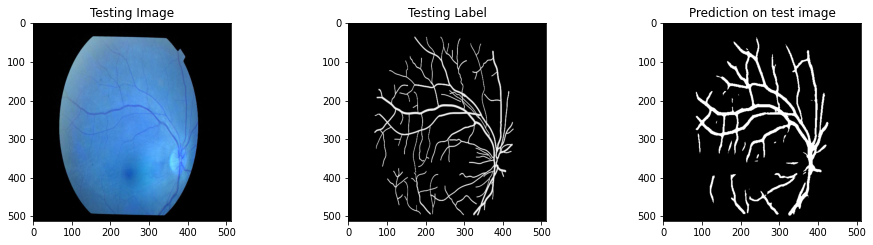

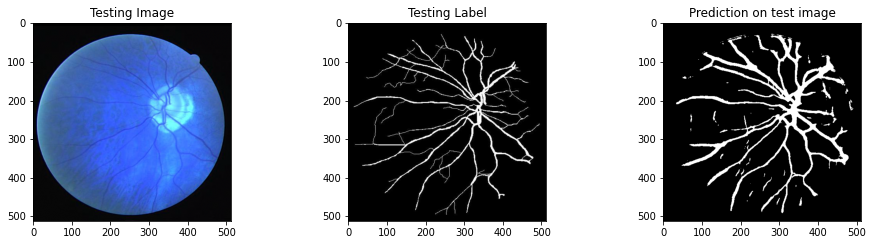

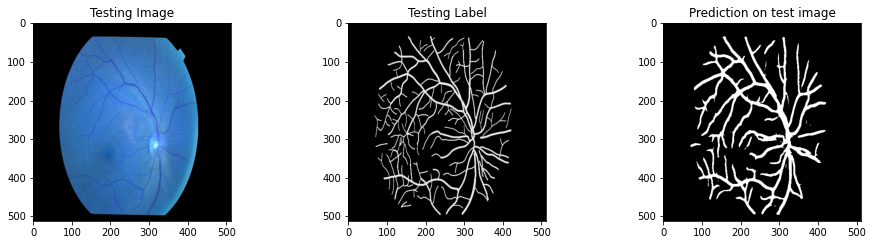

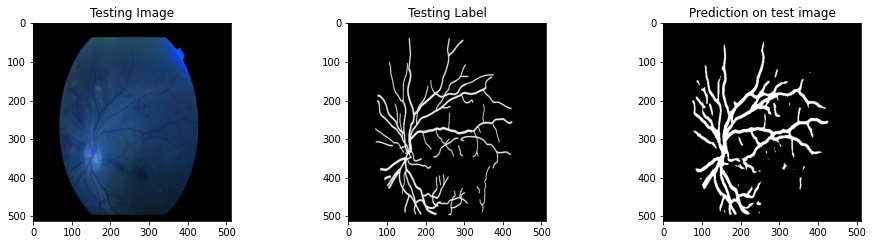

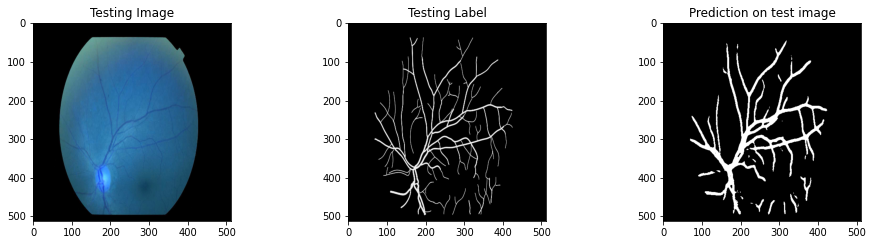

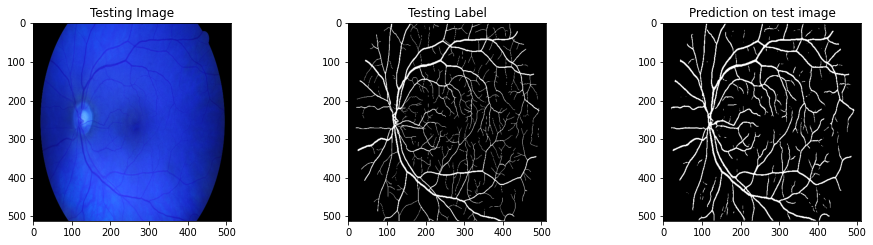

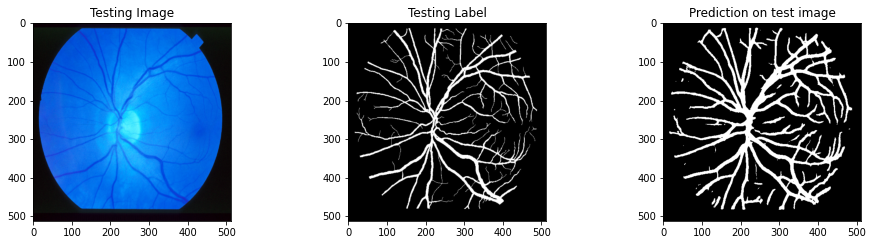

In [ ]:
for i in range(X_test.shape[0]):
  #X_test.shape[0]
  test_img_number=i
  name= 'result'+str(i)+'.jpg'
#test_img_number = random.randint(0, X_test.shape[0]-1)
  test_img = X_test[test_img_number]
  ground_truth=y_test[test_img_number]

  test_img_input=np.expand_dims(test_img, 0)
  prediction = (model2.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)

  plt.figure(figsize=(16, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img, cmap='gray')
  plt.subplot(232)
  plt.title('Testing Label')
  plt.imshow(ground_truth[:,:,0], cmap='gray')
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(prediction, cmap='gray')
  plt.savefig(name)
  plt.show()


#IoU for a single image
#from tensorflow.keras.metrics import MeanIoU
#n_classes = 2
#IOU_keras = MeanIoU(num_classes=n_classes)  
#IOU_keras.update_state(ground_truth[:,:,0], prediction)
#print("Mean IoU =", IOU_keras.result().numpy())

In [ ]:
import pandas as pd

IoU_values = []
for img in range(0, X_test.shape[0]):
    temp_img = X_test[img]
    ground_truth=y_test[img]
    temp_img_input=np.expand_dims(temp_img, 0)
    prediction = (model.predict(temp_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
    
    IoU = MeanIoU(num_classes=n_classes)
    IoU.update_state(ground_truth[:,:,0], prediction)
    IoU = IoU.result().numpy()
    IoU_values.append(IoU)

    print(IoU)
    


df = pd.DataFrame(IoU_values, columns=["IoU"])
df = df[df.IoU != 1.0]    
mean_IoU = df.mean().values
print("Mean IoU is: ", mean_IoU) 

0.57934093
0.5400639
0.43879128
0.4465809
0.44745255
0.5889956
0.5517801
0.41983032
0.43185043
0.4588642
0.44556427
0.44088554
0.44898796
0.46317965
0.49867842
0.5932521
0.5035816
0.6446314
0.4647751
0.5101226
0.46874186
0.45420265
0.46089745
0.57757986
0.61117005
0.4492817
0.47260797
0.56003153
0.42739296
0.44242668
0.4558468
0.5208125
0.43943977
0.45192719
0.45894814
0.63401663
0.46613735
Mean IoU is:  [0.49374784]


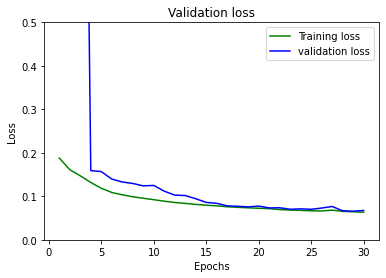

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,0.5)
plt.show()

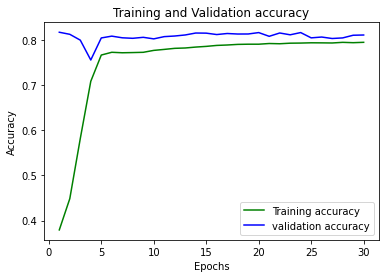

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(512, 512, 3)


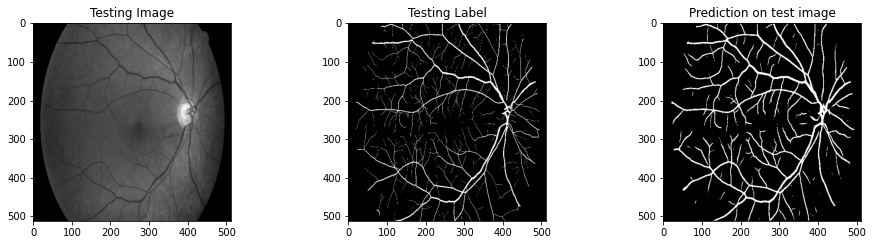

(512, 512, 3)


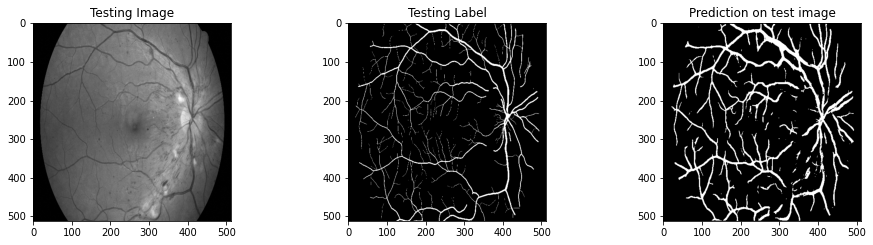

In [ ]:
for i in range(2):
  #X_test.shape[0]
  test_img_number=i
  name= 'result'+str(i)+'.jpg'
#test_img_number = random.randint(0, X_test.shape[0]-1)
  test_img = X_test[test_img_number]
  ground_truth=y_test[test_img_number]

  test_img_input=np.expand_dims(test_img, 0)
  prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
  print(test_img.shape)
  plt.figure(figsize=(16, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img[:,:,1], cmap='gray')
  plt.subplot(232)
  plt.title('Testing Label')
  plt.imshow(ground_truth[:,:,0], cmap='gray')
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(prediction, cmap='gray')
  #plt.savefig(name)
  plt.show()